In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

## Simulation

Sequence Parameter set 'largescaleSeq' initialized with 960 timepoint definitions
Dictionary Parameter set 'largescaleDict' initialized with 1106 entries
Simulating 1 batch(s) of ~1106 dictionary entries
Starting Batch: 0 (Entries 0->1106)
Simulation 'largescaleSeq_largescaleDict_32' already exists in .mrf file. Specify 'force' to overwrite
Simulation 'largescaleSeq_largescaleDict_32' already exists in .mrf file. Specify 'force' to overwrite


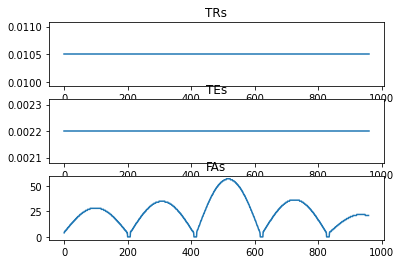

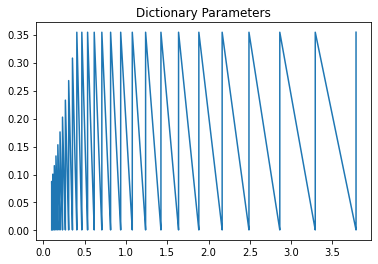

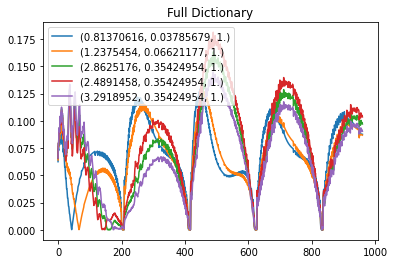

In [1]:
from mrftools import *
import numpy as np

# Create a sequence definition from text files
trFilepath = "largescale/TR_LS"
teFilepath = "largescale/TE_LS"
faFilepath = "largescale/FA_LS"
largescaleSeq = SequenceParameters.ImportFromTxt("largescaleSeq", SequenceType.FISP, trFilepath, teFilepath, faFilepath, baseTR=0.0105)
plt.figure(); 
largescaleSeq.Plot()

# Create a T1/T2/B1 dictionary with variable 10% step size
largescaleDict = DictionaryParameters.GenerateFixedPercent("largescaleDict", percentStepSize=15, includeB1=False)
(wmIndex, wmValue) = largescaleDict.GetNearestEntry(0.800,0.040,1)
(gmIndex, gmValue) = largescaleDict.GetNearestEntry(1.200,0.065,1)
(csfIndex, csfValue) = largescaleDict.GetNearestEntry(3.000,0.500,1)
(csfIndex1, csfValue1) = largescaleDict.GetNearestEntry(2.500,0.400,1)
(csfIndex2, csfValue2) = largescaleDict.GetNearestEntry(3.500,0.500,1)

plt.figure(); 
largescaleDict.Plot(); plt.title("Dictionary Parameters")

# Perform a simulation with 1 beat, 500 timepoints, and 5 averaged spins
largescaleSimulation = Simulation(largescaleSeq, largescaleDict, phaseRange=(-1*np.pi, 1*np.pi), numSpins=32)
largescaleSimulation.Execute()
#largescaleSimulation.CalculateSVD(25)

plt.figure(); largescaleSimulation.Plot(dictionaryEntryNumbers=[wmIndex,gmIndex,csfIndex,csfIndex1,csfIndex2]); plt.title("Full Dictionary")
#plt.figure(); largescaleSimulation.Plot(dictionaryEntryNumbers=[wmIndex,gmIndex,csfIndex,csfIndex1,csfIndex2], plotTruncated=True); plt.title("SVD Dictionary")

# Export the simulation, which includes copies of the sequence and dictionary
largescaleSimulation.Export("largescaleSimulation.mrf")
largescaleSimulation.Export("largescaleSimulation_noFullResults.mrf", includeFullResults=False)
